# Spark Fund Investment Analysis 
## Find the Investment Sector and County in which most of the Investor are Investing

###  Loading the files to dataframe companies and Round2 

In [357]:
import numpy as np
import pandas as pd

In [358]:
import chardet

In [359]:
with open("companies.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

{'encoding': 'utf-8', 'confidence': 0.7525, 'language': ''}


In [360]:
with open("rounds2.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


## Chech Point 1

In [140]:
companies = pd.read_csv('companies.csv',encoding ='ISO-8859-1' )
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [141]:
rounds2 = pd.read_csv("rounds2.csv", encoding= 'ISO-8859-1')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [142]:
print(companies.shape)
print(companies.columns)

(66368, 10)
Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')


In [143]:
print(rounds2.shape)
print(rounds2.columns)

(114949, 6)
Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')


In [144]:
#remove duplicates in companies
companies[~companies.duplicated() == True]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/ÃAsys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [145]:
#remove duplicates in rounds2
rounds2[~rounds2.duplicated()==True]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ÃASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [146]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [147]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Hybrid-Paytech,Peach,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [148]:
# Number of unique companies are present in the companies.csv
companies['name']=companies['name'].str.lower()
len(companies['name'].unique())

66035

In [149]:
companies['permalink']= companies['permalink'].str.lower()
len(companies['permalink'].unique())

66368

In [150]:
rounds2.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


In [151]:
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
len(rounds2['company_permalink'].unique())

66370

In [152]:
rounds2['funding_round_type'].value_counts()

venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

In [153]:
master_frame = pd.merge(rounds2,companies,how='inner', left_on='company_permalink',right_on ='permalink')
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114937,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114938,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114939,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN,/organization/ãeron,ãeron,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
114940,/organization/ãasys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0,/organization/ãasys-2,ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [154]:
master_frame = master_frame.drop('permalink',axis=1)

In [155]:
master_frame.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd', 'name',
       'homepage_url', 'category_list', 'status', 'country_code', 'state_code',
       'region', 'city', 'founded_at'],
      dtype='object')

In [156]:
master_frame.shape

(114942, 15)

## Check Point 2

In [157]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
dtype: int64

In [158]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

## Data Cleaning 

In [159]:
master_frame = master_frame.drop('funding_round_code',axis=1)
master_frame = master_frame.drop('funded_at',axis=1)

In [160]:
master_frame = master_frame.drop('founded_at',axis=1)
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
raised_amount_usd          17.39
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
dtype: float64

Raised amount USD is null is doesn't make any Scence because nothing/unknown invested in any companay will doesn't have any information for Investing we can remove those rows


In [161]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,NaN,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,700000.0,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,3406878.0,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
...,...,...,...,...,...,...,...,...,...,...,...,...
114937,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,41313.0,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split
114938,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,32842.0,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split
114939,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,NaN,ãeron,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN
114940,/organization/ãasys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,18192.0,ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco


In [162]:
master_frame= master_frame[~master_frame['raised_amount_usd'].isnull()]
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,700000.0,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,3406878.0,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,41250.0,01games technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong


In [163]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
raised_amount_usd          0.00
name                       0.00
homepage_url               4.56
category_list              1.10
status                     0.00
country_code               6.16
state_code                 8.01
region                     7.42
city                       7.42
dtype: float64

In [164]:
mode= master_frame['country_code'].mode()
fillvalue=mode[0]
fillvalue

'USA'

In [165]:
master_frame['country_code']= master_frame['country_code'].fillna(fillvalue)
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

<ipython-input-165-ccb30535da0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_frame['country_code']= master_frame['country_code'].fillna(fillvalue)


company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
raised_amount_usd          0.00
name                       0.00
homepage_url               4.56
category_list              1.10
status                     0.00
country_code               0.00
state_code                 8.01
region                     7.42
city                       7.42
dtype: float64

In [166]:
mode1 = master_frame['category_list'].mode()
fillvalue1 = mode1[0]
fillvalue1

'Biotechnology'

In [167]:
master_frame['category_list']= master_frame['category_list'].fillna(fillvalue1)
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

<ipython-input-167-388702b44128>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_frame['category_list']= master_frame['category_list'].fillna(fillvalue1)


company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
raised_amount_usd          0.00
name                       0.00
homepage_url               4.56
category_list              0.00
status                     0.00
country_code               0.00
state_code                 8.01
region                     7.42
city                       7.42
dtype: float64

In [168]:
fundround_frame = master_frame[(master_frame['funding_round_type']== 'venture')|
                               (master_frame['funding_round_type']== 'angel') |
                               (master_frame['funding_round_type']== 'seed')|
                               (master_frame['funding_round_type']== 'private_equity')]
fundround_frame

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,700000.0,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,3406878.0,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,USA,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,43360.0,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver
...,...,...,...,...,...,...,...,...,...,...,...,...
114934,/organization/zznode-science-and-technology-co...,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,1587301.0,zznode science and technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing
114935,/organization/zzzzapp-com,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,7000.0,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split
114936,/organization/zzzzapp-com,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,33149.0,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split
114938,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,32842.0,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split


In [169]:
gfundround_frame = fundround_frame.groupby('funding_round_type')
gfundround_frame['raised_amount_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,4860.0,9.586945e+05,7.404397e+06,0.0,150000.00,400000.0,1000000.0,4.945120e+08
private_equity,1936.0,7.330859e+07,1.981135e+08,0.0,5000000.00,20000000.0,75000000.0,4.745460e+09
seed,23602.0,7.197796e+05,2.221772e+06,0.0,55000.00,275000.0,1000000.0,2.000000e+08
venture,50228.0,1.174895e+07,8.635207e+07,0.0,1600901.75,5000000.0,12000000.0,1.760000e+10


In [170]:
gfundround_frame['raised_amount_usd'].mean().sort_values(ascending = False)

funding_round_type
private_equity    7.330859e+07
venture           1.174895e+07
angel             9.586945e+05
seed              7.197796e+05
Name: raised_amount_usd, dtype: float64

In [171]:
gfundround_frame['raised_amount_usd'].median().sort_values(ascending = False)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               400000.0
seed                275000.0
Name: raised_amount_usd, dtype: float64

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
%matplotlib inline

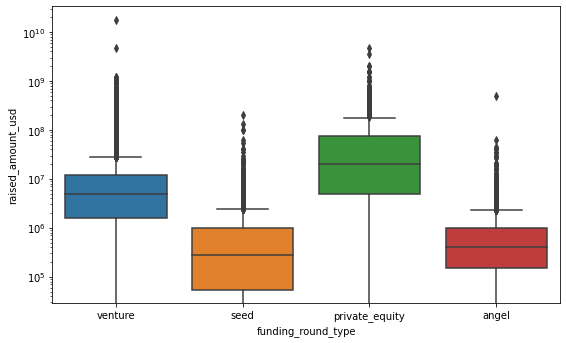

In [174]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'funding_round_type', y = 'raised_amount_usd', data = fundround_frame)
plt.yscale('log')
plt.show()

<b> From boxplot graph we can conclude that the Funding Round Types have the Outliers so considering mean for representing the is not good idea. To Represent values
we must consider  Median as good factor for the Funding Round Types</b>

In [175]:
gfundround_frame['raised_amount_usd'].median().sort_values(ascending = False)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               400000.0
seed                275000.0
Name: raised_amount_usd, dtype: float64

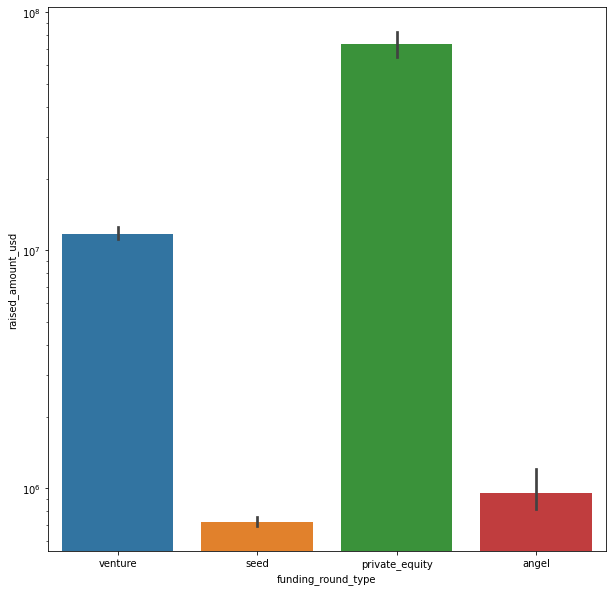

In [287]:
plt.figure(figsize=(10, 10))
sns.barplot(x = 'funding_round_type', y = 'raised_amount_usd', data = fundround_frame)
plt.yscale('log')
plt.show()

In [177]:
fundround_frame[fundround_frame['raised_amount_usd'].between(5000000,15000000)]['funding_round_type'].value_counts()

venture           16598
private_equity      429
seed                203
angel                72
Name: funding_round_type, dtype: int64

<b>From about Query we can conclude that the Funding of 5 Millon USD to 15 Millon USD can be done in Venture due to number of funding round types are most from Venture so Venture is good Investment</b>  

## Check Point3- Country Analysis 

In [178]:
country_df = master_frame[master_frame['funding_round_type'].isin(['venture'])]
country_df

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,3406878.0,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,USA,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,719491.0,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,20000000.0,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View
...,...,...,...,...,...,...,...,...,...,...,...,...
114924,/organization/zyraz-technology,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,7991547.0,zyraz technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village
114927,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,140500.0,zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge
114929,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,8500000.0,zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee
114930,/organization/zytoprotec,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,2686600.0,zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien


In [179]:
country = country_df.groupby('country_code')
country.mean()

,raised_amount_usd
country_code,
ARE,1.317760e+07
ARG,5.419635e+06
ARM,1.325875e+07
AUS,6.422014e+06
AUT,1.190481e+07
...,...
UKR,2.224058e+06
URY,2.478750e+06
USA,1.171102e+07


In [180]:
country.median()

,raised_amount_usd
country_code,
ARE,4000000.0
ARG,1600000.0
ARM,13258750.0
AUS,3850000.0
AUT,4051316.0
...,...
UKR,1500000.0
URY,1500000.0
USA,5000000.0


In [181]:
country.sum().sort_values(by='raised_amount_usd',ascending=False).head(9)

,raised_amount_usd
country_code,
USA,4.480170e+11
CHN,3.983542e+10
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09
FRA,7.259537e+09
ISR,6.907515e+09
DEU,6.346960e+09
JPN,3.363677e+09


## Check Point 4

In [219]:
top9 = country_df[country_df['country_code'].isin(["USA","CHN","GBR","IND","CAN","FRA","ISR","DEU","JPN"])]
top9

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,3406878.0,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,USA,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,719491.0,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,20000000.0,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View
...,...,...,...,...,...,...,...,...,...,...,...,...
114915,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,14219999.0,zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont
114916,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,555016.0,zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont
114927,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,140500.0,zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge
114929,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,8500000.0,zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee


In [220]:
top9.isnull().sum()

company_permalink             0
funding_round_permalink       0
funding_round_type            0
raised_amount_usd             0
name                          0
homepage_url               2503
category_list                 0
status                        0
country_code                  0
state_code                 2404
region                     2566
city                       2566
dtype: int64

In [221]:
round(100*(top9.isnull().sum()/len(top9.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
raised_amount_usd          0.00
name                       0.00
homepage_url               5.38
category_list              0.00
status                     0.00
country_code               0.00
state_code                 5.17
region                     5.52
city                       5.52
dtype: float64

In the data frame the homepage_url, state code, region and city doesn't show any effect on veture so droping the values insted of exsaturation

In [222]:
top9 = top9.drop('homepage_url',axis=1)

In [223]:
top9 = top9.drop('state_code',axis=1)
top9 = top9.drop('region',axis=1)
top9 = top9.drop('city',axis=1)
round(100*(top9.isnull().sum()/len(top9.index)), 2)

company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
raised_amount_usd          0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
dtype: float64

In [224]:
with open("mapping.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [225]:
mapping = pd.read_csv('mapping.csv',encoding='ascii')
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [226]:
mapping = mapping.drop('Blanks',axis=1)
mapping

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,0,0,0,0,0,0,0
1,3D,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,1,0,0,0,0,0
685,Wireless,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,1,0


In [227]:
value_vars = list(mapping.columns[1:])
id_vars = list(np.setdiff1d(mapping.columns,value_vars))
print(value_vars)
print(id_vars)

['Automotive & Sports', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising']
['category_list']


In [228]:
# converting wide to long dataframe using melt function
mapping = pd.melt(mapping,id_vars = id_vars, value_vars= value_vars,var_name='main_sector')
mapping 


,category_list,main_sector,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0
...,...,...,...
5499,Wholesale,"Social, Finance, Analytics, Advertising",0
5500,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
5501,Wireless,"Social, Finance, Analytics, Advertising",0
5502,Women,"Social, Finance, Analytics, Advertising",0


In [229]:
mapping = mapping[mapping.value==1]

In [230]:
mapping

,category_list,main_sector,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1
...,...,...,...
5433,Social Recruiting,"Social, Finance, Analytics, Advertising",1
5434,Social Television,"Social, Finance, Analytics, Advertising",1
5435,Social Travel,"Social, Finance, Analytics, Advertising",1
5446,Stock Exchanges,"Social, Finance, Analytics, Advertising",1


In [231]:
mapping = mapping.drop('value',axis=1)
mapping

,category_list,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports
...,...,...
5433,Social Recruiting,"Social, Finance, Analytics, Advertising"
5434,Social Television,"Social, Finance, Analytics, Advertising"
5435,Social Travel,"Social, Finance, Analytics, Advertising"
5446,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [232]:
top9['primary_sector']= top9['category_list'].apply(lambda x:str(x).split('|')[0])
top9

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,Media,operating,IND,Media
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,3406878.0,"(the) one of them,inc.",Apps|Games|Mobile,operating,USA,Apps
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.0,0-6.com,Curated Web,operating,CHN,Curated Web
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,719491.0,ondine biomedical inc.,Biotechnology,operating,CAN,Biotechnology
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,20000000.0,h2o.ai,Analytics,operating,USA,Analytics
...,...,...,...,...,...,...,...,...,...
114915,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,14219999.0,zyomyx,Biotechnology,operating,USA,Biotechnology
114916,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,555016.0,zyomyx,Biotechnology,operating,USA,Biotechnology
114927,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,140500.0,zyrra,E-Commerce,operating,USA,E-Commerce
114929,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,8500000.0,zystor,Biotechnology,acquired,USA,Biotechnology


In [233]:
sector_df = pd.merge(top9,mapping,how='inner',left_on='primary_sector',right_on='category_list')
sector_df

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,category_list_y,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,Media,operating,IND,Media,Media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,15000000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,5800000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,18000000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Media,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,5000000.0,all def digital,Media,operating,USA,Media,Media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...
43540,/organization/yapta,/funding-round/b1777df10578e852be3afbe3bc325435,venture,4220000.0,yapta,Tracking|Transportation|Travel,operating,USA,Tracking,Tracking,Others
43541,/organization/yapta,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,2000000.0,yapta,Tracking|Transportation|Travel,operating,USA,Tracking,Tracking,Others
43542,/organization/yapta,/funding-round/fc066baf3121b060b574214612a6c946,venture,1786563.0,yapta,Tracking|Transportation|Travel,operating,USA,Tracking,Tracking,Others
43543,/organization/yunnan-landsun-green-industry-gr...,/funding-round/83783f2b5911f41827bd6c72c1eee7fc,venture,7227332.0,yunnan landsun green industry (group),Tea,operating,CHN,Tea,Tea,Others


In [235]:
sector_df = sector_df.drop('category_list_y',axis=1)
sector_df

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,Media,operating,IND,Media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,15000000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,5800000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,18000000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,5000000.0,all def digital,Media,operating,USA,Media,Entertainment
...,...,...,...,...,...,...,...,...,...,...
43540,/organization/yapta,/funding-round/b1777df10578e852be3afbe3bc325435,venture,4220000.0,yapta,Tracking|Transportation|Travel,operating,USA,Tracking,Others
43541,/organization/yapta,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,2000000.0,yapta,Tracking|Transportation|Travel,operating,USA,Tracking,Others
43542,/organization/yapta,/funding-round/fc066baf3121b060b574214612a6c946,venture,1786563.0,yapta,Tracking|Transportation|Travel,operating,USA,Tracking,Others
43543,/organization/yunnan-landsun-green-industry-gr...,/funding-round/83783f2b5911f41827bd6c72c1eee7fc,venture,7227332.0,yunnan landsun green industry (group),Tea,operating,CHN,Tea,Others


In [236]:
sector_df.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,Media,operating,IND,Media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,15000000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,5800000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,18000000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,5000000.0,all def digital,Media,operating,USA,Media,Entertainment


In [252]:
sector_df['main_sector'].isnull().sum()

0

Creating three separate data frames D1, D2 and D3 for each of the top three countries (USA, GBR, IND) containing the observations of funding type venture falling within the 5-15 million USD range.

## Check Point 5

In [323]:
D1 = sector_df[sector_df['country_code'].isin(['USA'])]
print(D1['country_code'].value_counts())
D1.head()

USA    35753
Name: country_code, dtype: int64


,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,5000000.0,all def digital,Media,operating,USA,Media,Entertainment
5,/organization/audiosocket,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,650000.0,audiosocket,Media|Music|Technology,operating,USA,Media,Entertainment
6,/organization/audiosocket,/funding-round/4e3a53eec6c609943df752206070b23f,venture,750000.0,audiosocket,Media|Music|Technology,operating,USA,Media,Entertainment
7,/organization/audiosocket,/funding-round/bc0b412cf2fa7b739e4105ad756b47a4,venture,1582300.0,audiosocket,Media|Music|Technology,operating,USA,Media,Entertainment
8,/organization/babble,/funding-round/43cc678b39be3e684bb88501af05ff9b,venture,2000000.0,babble,Media|News|Parenting,acquired,USA,Media,Entertainment


In [324]:
D1 = D1[(D1['raised_amount_usd']>=5000000)&(D1['raised_amount_usd'] <= 15000000)]

In [325]:
D1

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,5000000.0,all def digital,Media,operating,USA,Media,Entertainment
14,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,5000000.0,chefsfeed,Media|Mobile|Restaurants|Technology,operating,USA,Media,Entertainment
20,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,5000000.0,the huffington post,Media|News|Publishing,acquired,USA,Media,Entertainment
21,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,5000000.0,the huffington post,Media|News|Publishing,acquired,USA,Media,Entertainment
26,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,10000000.0,matchmine,Media|News|Reviews and Recommendations,closed,USA,Media,Entertainment
...,...,...,...,...,...,...,...,...,...,...
43524,/organization/thisnext,/funding-round/3ba5a2f756c9754968fc1c1638f4f415,venture,5000000.0,thisnext,Social Buying|Social Media,operating,USA,Social Buying,"Social, Finance, Analytics, Advertising"
43527,/organization/thredhq,/funding-round/54166cbfbb75fb604c17a94f2205570e,venture,5000000.0,thredhq,Social + Mobile + Local|Social Network Media,operating,USA,Social + Mobile + Local,"Social, Finance, Analytics, Advertising"
43532,/organization/user-interface,/funding-round/ade267714c6ee533323f46a25b2db237,venture,8250000.0,user interface,User Interface,operating,USA,User Interface,Others
43534,/organization/washio,/funding-round/59026d26012c63b42fa2984c8f3c41ec,venture,10500000.0,washio,Service Industries,operating,USA,Service Industries,Others


In [326]:
D1['raised_amount_usd'].count()

11912

In [327]:
D1['raised_amount_usd'].sum()

106354355599.0

In [328]:
#Getting the sectors 
D1_sector = D1.groupby('main_sector')

In [329]:
D1_sector['raised_amount_usd'].count().sort_values(ascending=False).head()

main_sector
Others                                     3063
Cleantech / Semiconductors                 2548
Social, Finance, Analytics, Advertising    2008
News, Search and Messaging                 1664
Health                                      959
Name: raised_amount_usd, dtype: int64

In [330]:
D1_other_sector = D1[D1['main_sector']=='Others']
D1_other_sector

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector
8781,/organization/17zuoye,/funding-round/69690484f51e15bc27ff52bfe472cd96,venture,5000000.0,17zuoye,Education|Language Learning,operating,USA,Education,Others
8782,/organization/17zuoye,/funding-round/8d87f771e938e0f31641bd600abbafca,venture,10000000.0,17zuoye,Education|Language Learning,operating,USA,Education,Others
8788,/organization/5min,/funding-round/3dc5ee98a612bdc7b9066619e5882b67,venture,5000000.0,5min media,Education|Games|Video,acquired,USA,Education,Others
8789,/organization/5min,/funding-round/dfaaa3032b59dd4b69e6f957b48787fc,venture,7500000.0,5min media,Education|Games|Video,acquired,USA,Education,Others
8801,/organization/altierre,/funding-round/211e994a63ac514b52ee503fbaaa8a5e,venture,13000000.0,altierre,Education|Mobile|Wireless,operating,USA,Education,Others
...,...,...,...,...,...,...,...,...,...,...
43495,/organization/switchfly,/funding-round/c0df67d814378d7d53b67f756a6c49ee,venture,15000000.0,switchfly,Loyalty Programs|Online Travel|Software,operating,USA,Loyalty Programs,Others
43521,/organization/tactus-technology,/funding-round/e48e5b726d85e0da59ecad0b8daf0caa,venture,6000000.0,tactus technology,Human Computer Interaction,operating,USA,Human Computer Interaction,Others
43532,/organization/user-interface,/funding-round/ade267714c6ee533323f46a25b2db237,venture,8250000.0,user interface,User Interface,operating,USA,User Interface,Others
43534,/organization/washio,/funding-round/59026d26012c63b42fa2984c8f3c41ec,venture,10500000.0,washio,Service Industries,operating,USA,Service Industries,Others


In [331]:
D1_other_sector.groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  company_permalink                
Others       /organization/virtustream            64300000.0
             /organization/capella                54968051.0
             /organization/airtight-networks      54201907.0
             /organization/decarta                52100000.0
             /organization/black-duck-software    51000000.0
Name: raised_amount_usd, dtype: float64

In [332]:
D1_CS_sector = D1[D1['main_sector']=='Cleantech / Semiconductors']
D1_CS_sector

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector
1756,/organization/17-media,/funding-round/f8ffde9fa822843ac6ea9b66cc615df1,venture,10000000.0,17 media,Biotechnology,operating,USA,Biotechnology,Cleantech / Semiconductors
1761,/organization/22nd-century-group,/funding-round/50617d7ea8eaa838e2fd8eb8dfe06054,venture,10000000.0,22nd century group,Biotechnology,ipo,USA,Biotechnology,Cleantech / Semiconductors
1766,/organization/23andme,/funding-round/97062e0d50c2955cbe40bf8220d87b08,venture,9000000.0,23andme,Biotechnology|Search,operating,USA,Biotechnology,Cleantech / Semiconductors
1767,/organization/23andme,/funding-round/c27c1b420dfb34677a6ba449524f1c88,venture,12600000.0,23andme,Biotechnology|Search,operating,USA,Biotechnology,Cleantech / Semiconductors
1769,/organization/23andme,/funding-round/f261366b4fbf1840ad71b20ea0d9c7ce,venture,9000000.0,23andme,Biotechnology|Search,operating,USA,Biotechnology,Cleantech / Semiconductors
...,...,...,...,...,...,...,...,...,...,...
43328,/organization/liquidity-nanotech-corporation,/funding-round/494f305a9f6b175de31ad8a833cadcea,venture,8376852.0,liquidity nanotech corporation,Material Science|Nanotechnology|Water|Water Pu...,operating,USA,Material Science,Cleantech / Semiconductors
43377,/organization/mercatus,/funding-round/e31aa9a63a2369857d83fa1a471f3dda,venture,6709401.0,mercatus,Energy IT|Hardware + Software,operating,USA,Energy IT,Cleantech / Semiconductors
43393,/organization/mycotechnology,/funding-round/2dc2274f9cd7d8588f92d0775628fa6a,venture,9200000.0,mycotechnology,Disruptive Models|Material Science|Specialty F...,operating,USA,Disruptive Models,Cleantech / Semiconductors
43412,/organization/sunverge-energy-inc,/funding-round/2d73b074d01b5d5b1f553eb5cbd8af2c,venture,15000000.0,"sunverge energy, inc",Commercial Solar|Hardware + Software|Residenti...,operating,USA,Commercial Solar,Cleantech / Semiconductors


In [333]:
D1_CS_sector.groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                 company_permalink          
Cleantech / Semiconductors  /organization/biodesix         75300000.0
                            /organization/tigo-energy      68739496.0
                            /organization/forsight-labs    61300001.0
                            /organization/rheonix          56124758.0
                            /organization/scienergy        55375423.0
Name: raised_amount_usd, dtype: float64

In [334]:
D2 = sector_df[sector_df['country_code'].isin(['GBR'])]
print(D2['country_code'].value_counts())
D2.head()

GBR    1930
Name: country_code, dtype: int64


,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,15000000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,5800000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,18000000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
45,/organization/teepix,/funding-round/71b43b36b581697e603b256a13229994,venture,1655405.0,teepix,Media|Photography|Service Providers,operating,GBR,Media,Entertainment
181,/organization/flexion,/funding-round/9e34f51bfc6dc7f70dfbb3004c36e162,venture,2500000.0,flexion,Apps|Billing|Content|Digital Rights Management...,operating,GBR,Apps,"News, Search and Messaging"


In [268]:
D2 = D2[(D2['raised_amount_usd']>=5000000)&(D2['raised_amount_usd'] <= 15000000)]
D2

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,15000000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,5800000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
182,/organization/flypay,/funding-round/b6854cc7fc06ea76843ec89801f172f2,venture,10700000.0,flypay,Apps|Customer Service|Restaurants,operating,GBR,Apps,"News, Search and Messaging"
239,/organization/kaazing,/funding-round/0f43f5fbe8b360281ba135c717e47e0d,venture,15000000.0,kaazing,Apps|Data Integration|Enterprise Software|Info...,operating,GBR,Apps,"News, Search and Messaging"
281,/organization/mindshapes,/funding-round/ad81de5d230ca4ef1876e1c71bf097e3,venture,5000000.0,mindshapes,Apps|Education|Games|Kids|Textbooks|Virtual Wo...,operating,GBR,Apps,"News, Search and Messaging"
...,...,...,...,...,...,...,...,...,...,...
43076,/organization/lost-my-name,/funding-round/f40170cca8f612ead56ede1b34c480d2,venture,9000000.0,lost my name,Kids|Publishing,operating,GBR,Kids,Others
43100,/organization/songkick,/funding-round/0698b9660362675cedb52b8d064857a1,venture,10000000.0,songkick,Concerts|Music,operating,GBR,Concerts,Entertainment
43316,/organization/perpetuum,/funding-round/e26492fb6eddf9086f93362265460739,venture,10181710.0,perpetuum,Wireless,operating,GBR,Wireless,Entertainment
43499,/organization/yoyo,/funding-round/b18a6d85f32d12ace2366c0b7f85facc,venture,10000000.0,yoyo wallet,Loyalty Programs|Mobile|Mobile Payments|Retail,operating,GBR,Loyalty Programs,Others


In [269]:
D2['raised_amount_usd'].count()

584

In [270]:
D2['raised_amount_usd'].sum()

5086469206.0

In [271]:
#Getting the sectors 
D2_sector = D2.groupby('main_sector')
D2_sector['raised_amount_usd'].count().sort_values(ascending=False).head()

main_sector
Others                                     143
Cleantech / Semiconductors                 134
Social, Finance, Analytics, Advertising     98
News, Search and Messaging                  73
Entertainment                               54
Name: raised_amount_usd, dtype: int64

In [272]:
D2_other_sector = D2[D2['main_sector']=='Others']
D2_other_sector

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector
8831,/organization/brainbow,/funding-round/e03af44f798194f9f64fdff4cd37c2c6,venture,7000000.0,peak,Education|Games,operating,GBR,Education,Others
8907,/organization/fuse-universal,/funding-round/22075c2848566d82555d291715522b21,venture,10000000.0,fuse universal,Education|Internet|Social Media,operating,GBR,Education,Others
8975,/organization/medikidz,/funding-round/e0f4cb90ef25ab52a10f76d747665510,venture,5055753.0,medikidz,Education|Medical|Publishing,operating,GBR,Education,Others
9162,/organization/duncan-todd,/funding-round/b3970f931da68573bc142876142c403b,venture,8485408.0,duncan & todd,Local Businesses,operating,GBR,Local Businesses,Others
10047,/organization/almondy,/funding-round/d44f8bb9f1de72338d26e74607ea2c75,venture,5407412.0,almondy,Hospitality,operating,GBR,Hospitality,Others
...,...,...,...,...,...,...,...,...,...,...
42962,/organization/deltadot,/funding-round/052e51b97ab7d11ec2ac6961465ab514,venture,6100000.0,deltadot,Life Sciences,operating,GBR,Life Sciences,Others
43017,/organization/e-leathergroup,/funding-round/d3d71804ec6ff565dfaf89938a657ee8,venture,8425073.0,e-leathergroup,Textiles,operating,GBR,Textiles,Others
43076,/organization/lost-my-name,/funding-round/f40170cca8f612ead56ede1b34c480d2,venture,9000000.0,lost my name,Kids|Publishing,operating,GBR,Kids,Others
43499,/organization/yoyo,/funding-round/b18a6d85f32d12ace2366c0b7f85facc,venture,10000000.0,yoyo wallet,Loyalty Programs|Mobile|Mobile Payments|Retail,operating,GBR,Loyalty Programs,Others


In [273]:
D2_other_sector.groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  company_permalink                    
Others       /organization/electric-cloud             37000000.0
             /organization/sensage                    36250000.0
             /organization/enigmatic                  32500000.0
             /organization/silverrail-technologies    29000000.0
             /organization/opencloud                  27972766.0
Name: raised_amount_usd, dtype: float64

In [274]:
D2_CS_sector = D2[D2['main_sector']=='Cleantech / Semiconductors']
D2_CS_sector

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector
1804,/organization/abcodia,/funding-round/3d20c23d203134ed86c0d1b2bec288b2,venture,8259067.0,abcodia,Biotechnology,operating,GBR,Biotechnology,Cleantech / Semiconductors
1818,/organization/acacia-pharma,/funding-round/26eac8a3875e1a7bc68d36ceb7a71b05,venture,10000000.0,acacia pharma,Biotechnology,operating,GBR,Biotechnology,Cleantech / Semiconductors
2407,/organization/apitope,/funding-round/2efce6629e8d414150d6ea3051688b6a,venture,13456610.0,apitope,Biotechnology,operating,GBR,Biotechnology,Cleantech / Semiconductors
2444,/organization/aquapharm-biodiscovery,/funding-round/9596210901c76ba1bc8d6400662dd3c0,venture,6400000.0,aquapharm biodiscovery,Biotechnology,closed,GBR,Biotechnology,Cleantech / Semiconductors
2445,/organization/aquapharm-biodiscovery,/funding-round/aa7ccd58fc7608eb17c57f4029191e1a,venture,8216758.0,aquapharm biodiscovery,Biotechnology,closed,GBR,Biotechnology,Cleantech / Semiconductors
...,...,...,...,...,...,...,...,...,...,...
36016,/organization/powerlase,/funding-round/6019351d17cc3c8ff03358c72045b8f0,venture,13103216.0,powerlase photonics,Energy|Industrial|Innovation Management|Lasers...,acquired,GBR,Energy,Cleantech / Semiconductors
39652,/organization/bitstamp,/funding-round/2ca0619adde2547e15994bcb8c7fa837,venture,10000000.0,bitstamp,Bitcoin,operating,GBR,Bitcoin,Cleantech / Semiconductors
39944,/organization/amee,/funding-round/e4e6f9b7344ca6349943bd26332042fd,venture,5500000.0,amee,Carbon|Clean Energy|Open Source|Software|Susta...,acquired,GBR,Carbon,Cleantech / Semiconductors
40429,/organization/redeem,/funding-round/4feb3c2f027082484fa97f8a24d3b5fa,venture,13004958.0,redeem,Environmental Innovation,operating,GBR,Environmental Innovation,Cleantech / Semiconductors


In [275]:
D2_CS_sector.groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                 company_permalink                                                          
Cleantech / Semiconductors  /organization/eusa-pharma                                                      35600000.0
                            /organization/horizon-discovery                                                31353719.0
                            /organization/f-star-biotechnologische-forschungs-und-entwicklungsges-m-b-h    29132906.0
                            /organization/elixent                                                          25000000.0
                            /organization/takeda-cambridge                                                 22340000.0
Name: raised_amount_usd, dtype: float64

In [276]:
D3 = sector_df[sector_df['country_code'].isin(['IND'])]
print(D3['country_code'].value_counts())
D3.head()

IND    750
Name: country_code, dtype: int64


,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,Media,operating,IND,Media,Entertainment
24,/organization/manas-informatics,/funding-round/719e50301803d3918ffa558fc877e41c,venture,160000.0,manas informatic,Media|News,operating,IND,Media,Entertainment
124,/organization/chillr-2,/funding-round/c5477ed0c5d0f47db4d010094abcd317,venture,6000000.0,chillr,Apps|Banking|Mobile Payments,operating,IND,Apps,"News, Search and Messaging"
147,/organization/doormint,/funding-round/07ef4bbe43f9099323f7016c971e29ec,venture,3000000.0,doormint,Apps,operating,IND,Apps,"News, Search and Messaging"
236,/organization/jugnoo,/funding-round/89fc1dc3e31be5732df0fcabca9a0c08,venture,5000000.0,jugnoo,Apps|Social Business|Software,operating,IND,Apps,"News, Search and Messaging"


In [277]:
D3 = D3[(D3['raised_amount_usd']>=5000000)&(D3['raised_amount_usd'] <= 15000000)]
D3

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,Media,operating,IND,Media,Entertainment
124,/organization/chillr-2,/funding-round/c5477ed0c5d0f47db4d010094abcd317,venture,6000000.0,chillr,Apps|Banking|Mobile Payments,operating,IND,Apps,"News, Search and Messaging"
236,/organization/jugnoo,/funding-round/89fc1dc3e31be5732df0fcabca9a0c08,venture,5000000.0,jugnoo,Apps|Social Business|Software,operating,IND,Apps,"News, Search and Messaging"
318,/organization/peppertap,/funding-round/2c5621fec872c82f48ebbab0b7cfa6a0,venture,10000000.0,peppertap,Apps|Groceries|Online Shopping,operating,IND,Apps,"News, Search and Messaging"
440,/organization/tinyowl-technology,/funding-round/6139214390beddb0910642f6c5bf27b6,venture,7665775.0,tinyowl technology,Apps|Mobile|Specialty Foods,operating,IND,Apps,"News, Search and Messaging"
...,...,...,...,...,...,...,...,...,...,...
43037,/organization/livspace,/funding-round/8c6fdd230ae9e06797e722d678f47474,venture,8000000.0,livspace,Interior Design,operating,IND,Interior Design,Entertainment
43121,/organization/razorpay,/funding-round/5170659ad92ae8a7528c6932712fcb67,venture,9000000.0,razorpay,FinTech|Payments,operating,IND,FinTech,"Social, Finance, Analytics, Advertising"
43193,/organization/just-dial,/funding-round/d15d2e445d216378e134d25520f32ba0,venture,10000000.0,just dial,Local Search|Search,closed,IND,Local Search,"News, Search and Messaging"
43260,/organization/holidayiq-com,/funding-round/c402dcbdd413b7ea344a5681a4428645,venture,15000000.0,holidayiq,Resorts|Surveys|Travel,operating,IND,Resorts,Entertainment


In [278]:
D3['raised_amount_usd'].count()

301

In [279]:
D3['raised_amount_usd'].sum()

2710537552.0

In [280]:
#Getting the sectors 
D3_sector = D3.groupby('main_sector')
D3_sector['raised_amount_usd'].count().sort_values(ascending=False).head()

main_sector
Others                                     109
News, Search and Messaging                  52
Entertainment                               33
Social, Finance, Analytics, Advertising     32
Cleantech / Semiconductors                  22
Name: raised_amount_usd, dtype: int64

In [281]:
D3_other_sector = D3[D3['main_sector']=='Others']
D3_other_sector

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector
8918,/organization/hippocampus-learning-centres,/funding-round/72308a27cc9921b487d08481c926a01a,venture,13000000.0,hippocampus learning centres,Education,operating,IND,Education,Others
8919,/organization/hippocampus-learning-centres,/funding-round/e2f3c60223b199ff55c44bd58c84cd5d,venture,5000000.0,hippocampus learning centres,Education,operating,IND,Education,Others
8929,/organization/iprof-learning-solutions,/funding-round/0b08b0e63e79c8d76d2b37e8425009da,venture,9000000.0,iprof learning solutions,Education,operating,IND,Education,Others
8930,/organization/iprof-learning-solutions,/funding-round/d30bdbf0f3774a5b437d04714560ca9d,venture,6000000.0,iprof learning solutions,Education,operating,IND,Education,Others
8964,/organization/maharana-infrastructure-and-prof...,/funding-round/6ed1243491118b85cc90c43031600820,venture,13300000.0,maharana infrastructure and professional servi...,Education|Infrastructure|Universities,operating,IND,Education,Others
...,...,...,...,...,...,...,...,...,...,...
42130,/organization/conquest,/funding-round/3b5fbcf5e116cbeb33301f892cdc4dce,venture,6000000.0,conquest,Startups,operating,IND,Startups,Others
42392,/organization/itzcash-card-ltd,/funding-round/554a79a8f4b381ad15d6fadc63905da8,venture,10000000.0,itzcash card ltd.,Gift Card,operating,IND,Gift Card,Others
42393,/organization/itzcash-card-ltd,/funding-round/8b6a94dfeb36d406c4afe4d05503a6fd,venture,15000000.0,itzcash card ltd.,Gift Card,operating,IND,Gift Card,Others
42631,/organization/comat-technologies,/funding-round/3a62b7a293f2025a1c74c89a016ae791,venture,6000000.0,comat technologies,Governments|Health and Insurance,closed,IND,Governments,Others


In [282]:
D3_other_sector.groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  company_permalink             
Others       /organization/firstcry-com        39000000.0
             /organization/myntra              38000000.0
             /organization/commonfloor         32900000.0
             /organization/pepperfry-com       28000000.0
             /organization/itzcash-card-ltd    25000000.0
Name: raised_amount_usd, dtype: float64

In [284]:
D3_NSM_sector = D3[D3['main_sector']=='News, Search and Messaging']
D3_NSM_sector.shape

(52, 10)

In [285]:
D3_NSM_sector.groupby(['main_sector','company_permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                 company_permalink                             
News, Search and Messaging  /organization/gupshup-technology-india-pvt-ltd    33000000.0
                            /organization/imimobile                           23000000.0
                            /organization/sms-gupshup                         22000000.0
                            /organization/hike                                21000000.0
                            /organization/roadrunnr                           21000000.0
Name: raised_amount_usd, dtype: float64

## Check Point 6

### Figure 1  Funding Analysis

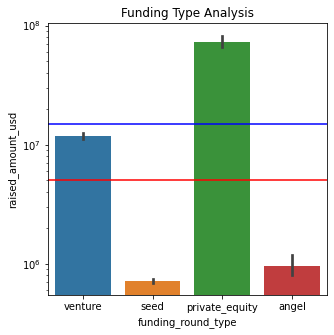

In [366]:
plt.figure(figsize=(5, 5))
FT=sns.barplot(x = 'funding_round_type', y = 'raised_amount_usd', data = fundround_frame)
FT.set_title('Funding Type Analysis')
plt.axhline(5000000,color='r')
plt.axhline(15000000,color='b')
plt.yscale('log')
plt.show()

In [306]:
top9_ci=country.sum().sort_values(by='raised_amount_usd',ascending=False).head(9)

In [311]:

top9_ci=top9_ci.reset_index()


In [312]:
top9_ci

,country_code,raised_amount_usd
0,USA,4.480170e+11
1,CHN,3.983542e+10
2,GBR,2.024563e+10
3,IND,1.439186e+10
4,CAN,9.583332e+09
5,FRA,7.259537e+09
6,ISR,6.907515e+09
7,DEU,6.346960e+09
8,JPN,3.363677e+09


### Figure 2  Country Analysis

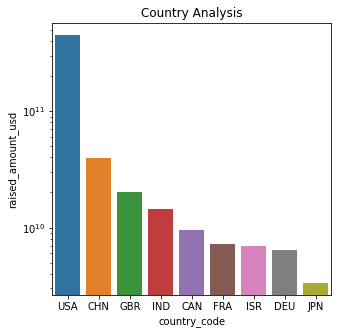

In [367]:
plt.figure(figsize=(5, 5))
FT=sns.barplot(x = 'country_code', y = 'raised_amount_usd', data = top9_ci)
FT.set_title('Country Analysis')
plt.yscale('log')
plt.show()

In [335]:
D1_sec_top3 = D1_sector.sum().sort_values(by='raised_amount_usd',ascending=False).reset_index()
D1_sec_top3

,main_sector,raised_amount_usd
0,Others,2.722281e+10
1,Cleantech / Semiconductors,2.338680e+10
2,"Social, Finance, Analytics, Advertising",1.754635e+10
3,"News, Search and Messaging",1.471255e+10
4,Health,8.644301e+09
5,Manufacturing,7.801044e+09
6,Entertainment,5.449170e+09
7,Automotive & Sports,1.591336e+09


In [336]:
D1_sec_top3 = D1_sec_top3.head(3)
D1_sec_top3

,main_sector,raised_amount_usd
0,Others,2.722281e+10
1,Cleantech / Semiconductors,2.338680e+10
2,"Social, Finance, Analytics, Advertising",1.754635e+10


In [337]:
D2_sec_top3 = D2_sector.sum().sort_values(by='raised_amount_usd',ascending=False).reset_index()
D2_sec_top3 = D2_sec_top3.head(3)
D2_sec_top3

,main_sector,raised_amount_usd
0,Others,1.249124e+09
1,Cleantech / Semiconductors,1.194670e+09
2,"Social, Finance, Analytics, Advertising",8.218884e+08


In [339]:
D3_sec_top3 = D3_sector.sum().sort_values(by='raised_amount_usd',ascending=False).reset_index()
D3_sec_top3

,main_sector,raised_amount_usd
0,Others,1.007410e+09
1,"News, Search and Messaging",4.338345e+08
2,"Social, Finance, Analytics, Advertising",2.905435e+08
3,Entertainment,2.808300e+08
4,Manufacturing,2.009000e+08
5,Cleantech / Semiconductors,1.923800e+08
6,Health,1.677400e+08
7,Automotive & Sports,1.369000e+08


In [343]:
D3_sec_top3 = D3_sector.sum().sort_values(by='raised_amount_usd',ascending=False).reset_index()
D3_sec_top3 = D3_sec_top3.head(3)
D3_sec_top3

,main_sector,raised_amount_usd
0,Others,1.007410e+09
1,"News, Search and Messaging",4.338345e+08
2,"Social, Finance, Analytics, Advertising",2.905435e+08


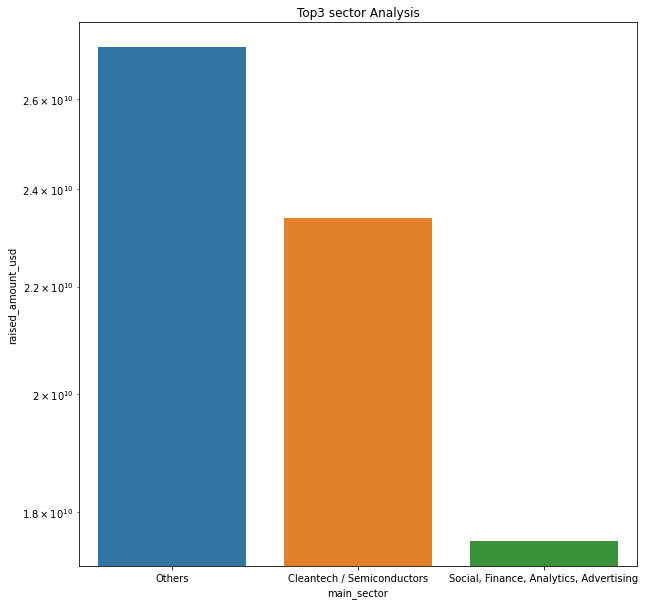

In [361]:
plt.figure(figsize=(10, 10))
FT=sns.barplot(x = 'main_sector', y = 'raised_amount_usd', data = D1_sec_top3)
FT.set_title('Top3 sector Analysis')
plt.yscale('log')
plt.show()

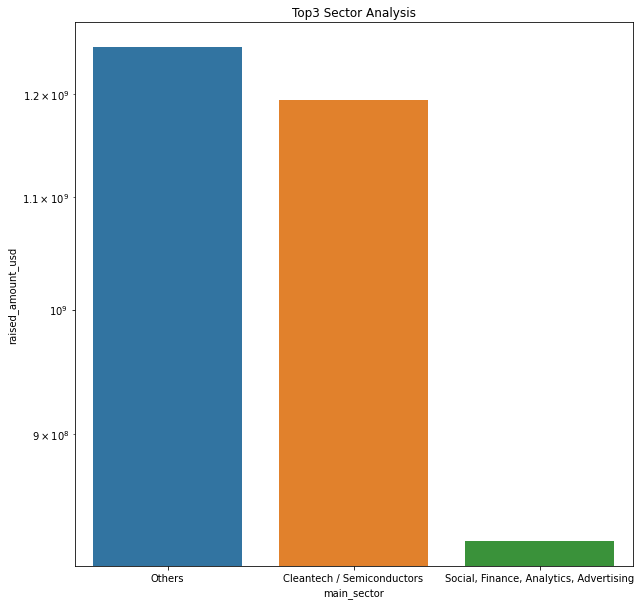

In [362]:
plt.figure(figsize=(10, 10))
FT=sns.barplot(x = 'main_sector', y = 'raised_amount_usd', data = D2_sec_top3)
FT.set_title('Top3 Sector Analysis')
plt.yscale('log')
plt.show()

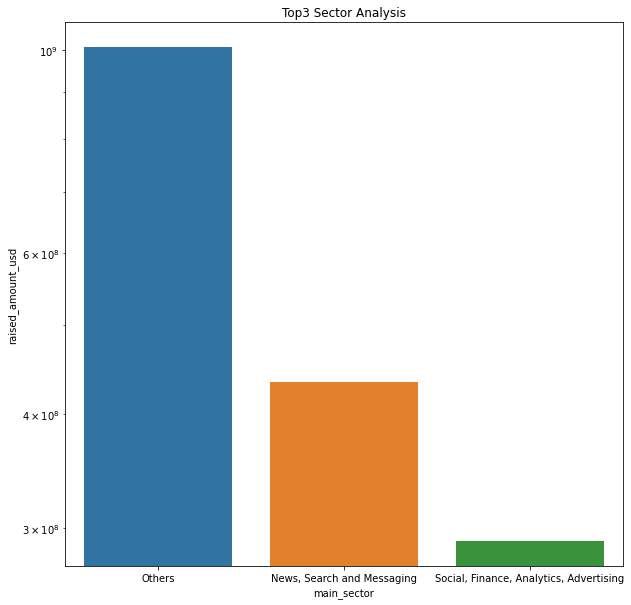

In [363]:
plt.figure(figsize=(10, 10))
FT=sns.barplot(x = 'main_sector', y = 'raised_amount_usd', data = D3_sec_top3)
FT.set_title('Top3 Sector Analysis')
plt.yscale('log')
plt.show()

In [351]:
D5 = pd.concat([D1_sec_top3,D2_sec_top3])
D5

,main_sector,raised_amount_usd
0,Others,2.722281e+10
1,Cleantech / Semiconductors,2.338680e+10
2,"Social, Finance, Analytics, Advertising",1.754635e+10
0,Others,1.249124e+09
1,Cleantech / Semiconductors,1.194670e+09
2,"Social, Finance, Analytics, Advertising",8.218884e+08


In [348]:
D_final = pd.concat([D5,D3_sec_top3])
D_final

,main_sector,raised_amount_usd
0,Others,2.722281e+10
1,Cleantech / Semiconductors,2.338680e+10
2,"Social, Finance, Analytics, Advertising",1.754635e+10
0,Others,1.249124e+09
1,Cleantech / Semiconductors,1.194670e+09
2,"Social, Finance, Analytics, Advertising",8.218884e+08
0,Others,1.007410e+09
1,"News, Search and Messaging",4.338345e+08
2,"Social, Finance, Analytics, Advertising",2.905435e+08


### Figure 3  Top 3 Sector of Top 3 Countries

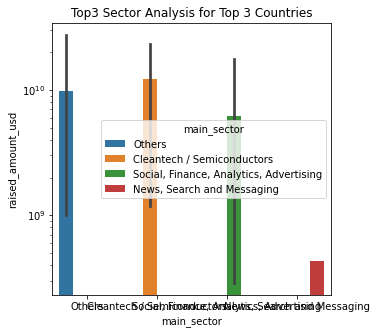

In [368]:
plt.figure(figsize=(5, 5))
FT=sns.barplot(x = 'main_sector', y = 'raised_amount_usd',hue='main_sector', data = D_final)
FT.set_title('Top3 Sector Analysis for Top 3 Countries')
plt.yscale('log')
plt.show()